In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
# load data 
df = pd.read_csv('Sales Dataset.csv')
df.sample(5)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
629,B-26684,7434,2851,5,Office Supplies,Markers,UPI,2022-12-12,Jesse Bond,Illinois,Springfield,2022-12
778,B-25330,2957,917,16,Office Supplies,Pens,Debit Card,2024-11-17,Katrina Wood,Illinois,Chicago,2024-11
717,B-25830,3839,1415,10,Office Supplies,Binders,UPI,2023-10-17,Vincent Roth,California,Los Angeles,2023-10
598,B-26191,8994,1481,15,Electronics,Phones,Credit Card,2020-06-21,James Bonilla,California,San Diego,2020-06
542,B-25962,4202,1171,3,Office Supplies,Markers,COD,2022-10-31,Donald Moore,New York,Rochester,2022-10


# Cleaning data

In [4]:
df.shape

(1194, 12)

In [5]:
df.columns

Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'PaymentMode', 'Order Date', 'CustomerName', 'State', 'City',
       'Year-Month'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1194 non-null   object
 1   Amount        1194 non-null   int64 
 2   Profit        1194 non-null   int64 
 3   Quantity      1194 non-null   int64 
 4   Category      1194 non-null   object
 5   Sub-Category  1194 non-null   object
 6   PaymentMode   1194 non-null   object
 7   Order Date    1194 non-null   object
 8   CustomerName  1194 non-null   object
 9   State         1194 non-null   object
 10  City          1194 non-null   object
 11  Year-Month    1194 non-null   object
dtypes: int64(3), object(9)
memory usage: 112.1+ KB


In [7]:
df.describe()

,Amount,Profit,Quantity
count,1194.000000,1194.000000,1194.000000
mean,5178.089615,1348.992462,10.674204
std,2804.921955,1117.992573,5.777102
min,508.000000,50.000000,1.000000
25%,2799.000000,410.000000,6.000000
50%,5152.000000,1014.000000,11.000000
75%,7626.000000,2035.000000,16.000000
max,9992.000000,4930.000000,20.000000


In [8]:
df.isna().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
Year-Month      0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

# Data Pre_processing

In [10]:
df.sample(5)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
934,B-25043,2727,663,8,Electronics,Phones,Credit Card,2022-11-07,Austin Hammond,Florida,Miami,2022-11
1170,B-25794,7417,1334,16,Furniture,Bookcases,COD,2021-10-05,Amber Flowers,Florida,Tampa,2021-10
13,B-25426,7626,1046,15,Furniture,Sofas,Credit Card,2020-05-04,Mary Taylor,Florida,Orlando,2020-05
988,B-26279,3194,534,4,Office Supplies,Binders,UPI,2020-07-12,Kristin Alvarez,Illinois,Springfield,2020-07
408,B-26743,7684,1157,12,Furniture,Sofas,COD,2023-08-21,Pamela Callahan DVM,Ohio,Columbus,2023-08


In [11]:
df['Category'].value_counts()

Category
Furniture          407
Office Supplies    399
Electronics        388
Name: count, dtype: int64

In [12]:
df['Sub-Category'].value_counts()

Sub-Category
Tables              122
Pens                114
Sofas               114
Markers             110
Electronic Games    104
Paper               104
Phones              101
Printers             95
Laptops              88
Bookcases            88
Chairs               83
Binders              71
Name: count, dtype: int64

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [14]:
df.dtypes

Order ID                object
Amount                   int64
Profit                   int64
Quantity                 int64
Category                object
Sub-Category            object
PaymentMode             object
Order Date      datetime64[ns]
CustomerName            object
State                   object
City                    object
Year-Month              object
dtype: object

In [15]:
df['year'] = df['Order Date'].dt.year

In [16]:
df['month'] = df['Order Date'].dt.month

In [17]:
df['day'] = df['Order Date'].dt.day

In [18]:
df['Order Date'].dt.quarter

0       2
1       4
2       3
3       2
4       4
       ..
1189    3
1190    2
1191    4
1192    3
1193    4
Name: Order Date, Length: 1194, dtype: int32

In [19]:
df.set_index(df['Order Date'], inplace= True)

In [20]:
df.sample(5)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month,year,month,day
Order Date,,,,,,,,,,,,,,,
2022-03-08,B-25809,9916,4602,14,Furniture,Chairs,UPI,2022-03-08,Kelly Smith,Ohio,Cleveland,2022-03,2022,3,8
2020-09-26,B-26501,8851,3962,7,Furniture,Tables,EMI,2020-09-26,Ricky Smith,Florida,Miami,2020-09,2020,9,26
2023-05-24,B-26522,5994,2826,9,Furniture,Bookcases,EMI,2023-05-24,John Thomas,California,San Francisco,2023-05,2023,5,24
2023-10-27,B-26489,6223,1478,3,Furniture,Sofas,Debit Card,2023-10-27,Anna Blackburn,Ohio,Cincinnati,2023-10,2023,10,27
2024-11-21,B-25881,8709,2322,8,Furniture,Tables,Debit Card,2024-11-21,Kristin Hart,California,San Francisco,2024-11,2024,11,21


In [21]:
# df[df.duplicated()]

# EDA
    -- Univariate Analysis
    -- Bivariate Analysis
    -- Multivariate Analysis

### 1] Univariate Analysis
        -- Category

In [22]:
df['Category']

Order Date
2023-06-27        Electronics
2024-12-27        Electronics
2021-07-25        Electronics
2023-06-27        Electronics
2024-12-27        Electronics
                   ...       
2024-07-31          Furniture
2020-06-02        Electronics
2022-12-15        Electronics
2020-08-07        Electronics
2024-10-26    Office Supplies
Name: Category, Length: 1194, dtype: object

##### Feature Overview (Category)

In [23]:
df['Category'].describe(include= 0)

count          1194
unique            3
top       Furniture
freq            407
Name: Category, dtype: object

In [24]:
df['Category'].count()

np.int64(1194)

In [25]:
df['Category'].nunique()

3

In [26]:
df['Category'].value_counts().max()  ## top

np.int64(407)

In [27]:
df['Category'].value_counts() # how many good in any Category?

Category
Furniture          407
Office Supplies    399
Electronics        388
Name: count, dtype: int64

In [28]:
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

fig = px.bar(
    data_frame=category_counts,
    x='Category',
    y='Count',
    color = 'Category',
    title='Total number of goods in every category',
    text='Count'   
)

fig.update_traces(texttemplate='%{text}', textposition='outside')  
fig.show()

<Axes: title={'center': 'Dist of Cat'}, ylabel='count'>

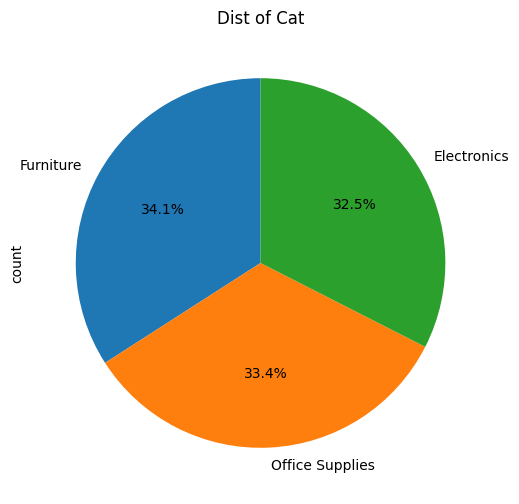

In [29]:
df['Category'].value_counts().plot(kind= 'pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6), title= 'Dist of Cat')

### Univariate
    -- sub category

In [30]:
df['Sub-Category'].value_counts()

Sub-Category
Tables              122
Pens                114
Sofas               114
Markers             110
Electronic Games    104
Paper               104
Phones              101
Printers             95
Laptops              88
Bookcases            88
Chairs               83
Binders              71
Name: count, dtype: int64

In [31]:
sub_category_counts = df['Sub-Category'].value_counts().reset_index()
sub_category_counts.columns = ['Sub-Category', 'Count']

fig = px.bar(
    data_frame= sub_category_counts,
    x='Sub-Category',
    y='Count',
    color = 'Sub-Category',
    title='Total number of goods in every Sub Category',
    text='Count'   
)

fig.update_traces(texttemplate='%{text}', textposition='outside')  
fig.show()

In [34]:
px.scatter(data_frame= sub_category_counts,
            x = 'Sub-Category',
            y = 'Count',
            color= 'Sub-Category',
            size= 'Count',
            ).update_traces(texttemplate='%{text}')  

### 2] Bivariate Analysis

In [ ]:
df.sample(2)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month,year,month,day
Order Date,,,,,,,,,,,,,,,
2020-10-17,B-25730,2863,205,17,Electronics,Phones,UPI,2020-10-17,Ms. Emily Baxter,New York,Rochester,2020-10,2020,10,17
2024-06-15,B-25873,2684,713,2,Electronics,Electronic Games,UPI,2024-06-15,Meghan Ballard,New York,New York City,2024-06,2024,6,15


In [ ]:
df.groupby('Category')['Amount'].sum().sort_values(ascending = False)

Category
Office Supplies    2089510
Electronics        2054456
Furniture          2038673
Name: Amount, dtype: int64

In [ ]:
category_amounts = (
    df.groupby('Category')['Amount']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)


fig = px.bar(
    data_frame=category_amounts,
    x='Category',
    y='Amount',
    color='Category',   
    text='Amount'       
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')  # يظبط شكل القيم
fig.update_layout(yaxis_title="Total Amount", xaxis_title="Category")

fig.show()

#### what is the total profit made by each Category ?

In [ ]:
df.groupby('Category', as_index= False)['Profit'].sum().sort_values(by = 'Profit', ascending= False)

,Category,Profit
2,Office Supplies,551575
1,Furniture,540542
0,Electronics,518580


In [ ]:
category_profit = (
    df.groupby('Category', as_index=False)['Profit']
    .sum()
    .sort_values(by='Profit', ascending=False)
)


fig = px.bar(
    data_frame=category_profit,
    x='Category',
    y='Profit',
    text='Profit',
    color='Category'   
)


fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(yaxis_title="Total Profit", xaxis_title="Category")

fig.show()

### Bivariate analysis
    -- Sub_category

In [ ]:
df.groupby('Sub-Category')['Amount'].sum().sort_values(ascending = False)

Sub-Category
Markers             627875
Tables              625177
Sofas               568367
Printers            566359
Electronic Games    565092
Pens                552269
Paper               524755
Phones              503055
Chairs              431964
Laptops             419950
Bookcases           413165
Binders             384611
Name: Amount, dtype: int64

In [ ]:
sub_category_amounts = (
    df.groupby('Sub-Category')['Amount']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)


fig = px.bar(
    data_frame=sub_category_amounts,
    x='Sub-Category',
    y='Amount',
    color='Sub-Category',   
    text='Amount'       
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')  
fig.update_layout(yaxis_title="Total Amount", xaxis_title="Sub-Category")

fig.show()

## 3] Multivariate Analysis

In [ ]:
fig = px.scatter(
    df,
    x='Amount',
    y='Profit',
    color='Category',
    size='Quantity',
    hover_data=['CustomerName', 'City']
)
fig.show()


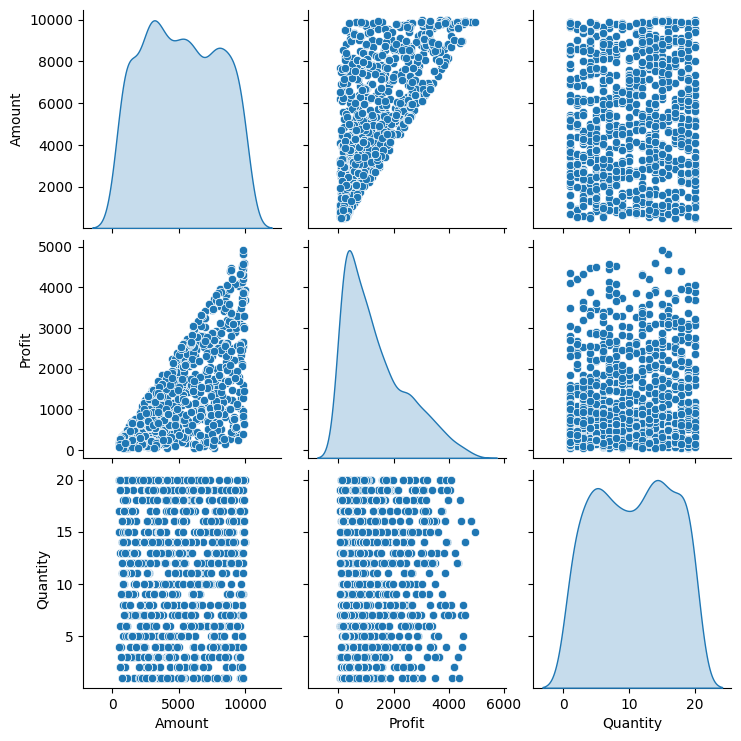

In [ ]:
sns.pairplot(df[['Amount','Profit','Quantity']], diag_kind='kde')
plt.show()

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

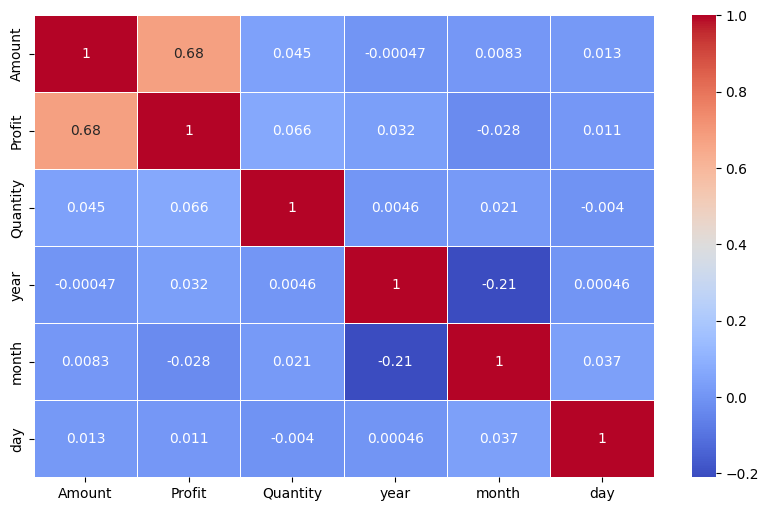

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

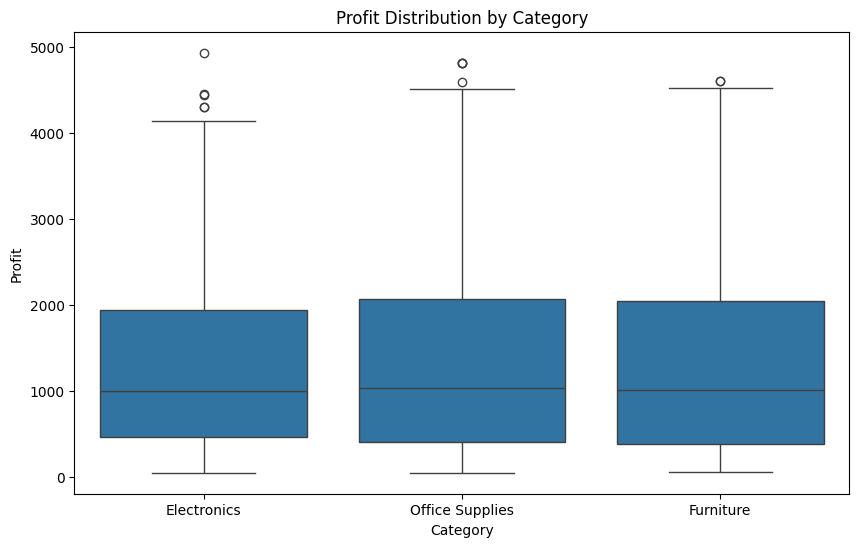

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Category', y='Profit')
plt.title('Profit Distribution by Category')
plt.show()